In [82]:
# モジュール・ライブラリのインポート（必ず最初に実行）
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import optimize

# 日本語フォントの設定（Mac:'Hiragino Sans', Windows:'MS Gothic'）
plt.rcParams['font.family'] = 'Hiragino Sans'

# 表記の設定
pd.set_option('display.precision', 3)   # 小数点以下の表示桁
pd.set_option('display.max_rows', 20)  # 表示する行数
pd.set_option('display.max_columns', 10)  # 表示する行数
%precision 3

'%.3f'

# 確率の応用

## 確率変数と確率分布

### 確率変数

確率を数学的に扱うには，確率的な事象を数値で表わし，その数値に対して確率が定まっている必要がある．
例えば，サイコロを投げる場合，目の数字を変数と見なすと，各事象には1から6までの整数値が与えられ，それぞれの事象の確率は1/6である．
このように，確率的な事象に数値を対応させた変数 $ X $ に対して $ X=x $ となる確率が定まっているとき，$ X $ を**確率変数**と呼ぶ．
一般に，確率変数 $ X $ は大文字で表し，その**実現値**（個々の試行の結果）は小文字で表す．
もし，確率変数 $ X $ が離散的な値 $ x_{1},\ x_{2},\ \cdots $ しか取らないとき（サイコロの目など），$ X $ を**離散型確率変数**と呼ぶ．
一方，$ X $ が連続値を取る場合（重さ，長さ，時間など）は**連続型確率変数**と呼ぶ．

### 離散型確率分布

離散型確率変数 $ X $ が実現値 $ x_{i} $ を取る確率を

$$
	P(X=x_{i}) = f(x_{i})
$$

と表す．
ただし，$ f $ は以下の条件を満たすとする：

$$
	f(x_{i}) \geq 0, \hspace{0.5cm}かつ \hspace{0.5cm} \sum_{i=1}^{\infty} f(x_{i})=1
$$

このように，確率変数 $ X $ の各実現値 $ x_{1},\ x_{2},\ \cdots $ に対してその確率を対応させた関数 $ f $ を**確率分布関数**と呼ぶ．

特に，$ X $ が離散型確率変数の場合，$ f $ を**離散型確率分布**または**確率（質量）関数**と呼ぶ．
また，確率変数 $ X $ が $ x $ 以下である確率を

$$
	P(X \leq x) = F(x) = \sum_{x_{i}\leq x} f(x_{i})
$$

と表し，これを**累積分布関数**と呼ぶ．
なお，離散型確率変数の累積分布は不連続な関数となる．

なお，記述統計学において，度数分布（ヒストグラム）を扱ったが，これは与えられたデータに対して，階級値と（相対）度数が対応したものであった．
データ数 $ n $ が十分大きい（$ n\to \infty $）ときに相対度数が確率に一致するということを踏まえると，確率分布とはヒストグラムに対する理論的なモデルと捉えることができる．

例として，サイコロを１個投げた場合を考える．
この場合，確率変数の実現値は $ 1,2,3,4,5,6 $ であり，それぞれの確率が $ 1/6 $ なので，確率分布は以下のようになる：

$$
	f(1) = \frac{1}{6},\ f(2) = \frac{1}{6},\ f(3) = \frac{1}{6},\ f(4) = \frac{1}{6},\ f(5) = \frac{1}{6},\ f(6) = \frac{1}{6}
$$

なお，このように全ての実現値に対して同じ確率を取るような確率分布を**一様分布**と呼ぶ．

### 連続型確率分布

連続型確率変数の場合，確率変数 $ X $ がある実現値 $ a $ を取る確率はゼロとなる：

$$
	P(X=a) = 0
$$

そこで，連続型確率変数の場合には，$ X $ がある範囲 $ a \leq X \leq b $ に入る確率

$$
	P(a \leq X \leq b) = \int_{a}^{b} f(x) dx
$$

を考え，これを**確率密度関数**と呼ぶ．
ただし，$ f $ は以下の条件を満たす：

$$
	f(x) \geq 0, \hspace{0.5cm}かつ \hspace{0.5cm} \int_{-\infty}^{\infty} f(x) dx = 1
$$

連続型確率変数 $ X $ の取る値が $ x $ 以下である確率を

$$
	F(x) = \int_{-\infty}^{x} f(x') dx'
$$

と表し，これを**累積分布関数**と呼ぶ．
なお，微分積分学の基本定理より，累積分布関数と確率密度関数は

$$
	f(x) = \frac{d F(x)}{d x}
$$
の関係にある．

## 期待値と分散

### 期待値

確率分布関数に対してもヒストグラムにおける平均値に対応する量を定義でき，これを**期待値**と呼ぶ．
これは，試行の結果期待される値という意味である．
一般に，確率変数 $ X $ に対する期待値は $ E(X) $ と表し，離散型，連続型それぞれに対して以下で定義される：

\begin{align*}
	\begin{split}
	E(X) &= \sum_{i=1}^{n} x_{i} f(x_{i}) \hspace{0.5cm} \textrm{（離散型）}\\[15pt]
	E(X) &= \int_{-\infty}^{\infty} x f(x) dx \hspace{0.5cm} \textrm{（連続型）}
	\end{split}
\end{align*}

### 分散

期待値は分布の重心を表す指標であるが，期待値が同じでも形状が異なる分布はたくさんある．
そこで，分布の形状に関するより詳しい情報を得るには，分布のばらつき具合を表す指標が必要となる．
これが分散であり，$ \mu = E[X] $に対して

$$
	V(X) = E[(X-\mu)^{2}]
$$

と定義される．
特に，離散型，連続型の確率変数に対して以下のように与えられる：

\begin{align*}
	\begin{split}
	V(X) &= \sum_{i} (x_{i}-\mu)^{2} f(x_{i}) \hspace{0.5cm}\textrm{（離散型）} \\
	V(X) &= \int_{-\infty}^{\infty} (x-\mu)^{2} f(x) dx \hspace{0.5cm}\textrm{（連続型）}
	\end{split}
\end{align*}


なお，確率分布の標準偏差は分散の平方根として定義される．

#### 例）宝くじ

「くじ」を引いた時にどのくらいの賞金が期待できるかを表すのが期待金額であり，これが確率変数の期待値の本来的な意味である．
いま，1から100までの番号がついた100個の玉が入っている箱から玉を1個取り出す．
このとき，玉の番号に応じて賞金 $ X $ の金額が以下のように決まっているとする（単位は円）：

- 番号が1から60：$ x_{1}=0 $
- 番号が61から90：$ x_{2}=100 $
- 番号が91から100：$ x_{3}=10000 $

これより，くじを1回引いて $ x_{1},\ x_{2},\ x_{3} $ という結果が起きる確率（確率分布）は

$$
	f(x_{1})=0.6,\ f(x_{2})=0.3,\ f(x_{3})=0.1
$$

である．
このとき，くじを多数回引くときに得られる1回当たりの金額が期待値であり，以下のように計算される：

\begin{align*}
	E(X) &= \sum_{i=1}^{3} x_{i}f(x_{i})\\
	&= x_{1}f(x_{1}) + x_{2}f(x_{2}) + x_{3}f(x_{3}) \\
	&= 0\times 0.6 + 100\times 0.3 + 10000 \times 0.1 \\
	&= 130 \textrm{（円）}
\end{align*}

このようなくじを１回300円くらいの金額に設定しておけば，たまに1000円のあたりが出たとしても，トータルでは損をすることはない．

下表は1枚300円のある宝くじの賞金と当選確率の関係（確率分布）である．
この宝くじの賞金 $ x $ に対してその期待値を計算すると，$ E[X] = 134 $ 円となる．
宝くじの値段300円に対して期待値が134円であり，買い手からすると明らかに損をするように見える．
しかし，標準偏差の値は約10万円であり，ばらつきも非常に大きいことが分かる．
これは，購入枚数が少なければ大勝する可能性がある一方で，購入枚数が増えるほど損をすることを意味する．

| 賞      | 賞金 $ x $ （円）                         | 当選確率 $ f(x) $ |
| :----------: | :--------------------------------------: | :----: |
| 1等    | $ 3\times 10^{8} $ | $ 1/10^{7} $ |
| 1等前後賞 | $ 1\times 10^{8} $ | $ 2/10^{7} $ |
| 2等 | $ 1\times 10^{7} $ | $ 4/10^{7} $ |
| 3等  | $ 1\times 10^{5} $ | $ 1/10^{4} $ |
| 4等  | $ 1\times 10^{4} $ | $ 2/10^{3} $ |
| 5等  | $ 2\times 10^{3} $ | $ 1/100 $ |
| 6等  | $ 3\times 10^{2} $ | $ 1/10 $ |
| はずれ  | $ 0 $ | $ 0.8878993 $ |

## 代表的な離散型確率分布

### 一様分布

$$ f(x) = \frac{1}{b-a+1} \quad (a\leq x \leq b) $$

- $ a \leq x \leq b $ において，一定確率を取る分布．
- 具体例：サイコロを1回投げた場合は $ a=1,\ b=6 $ の一様分布に従う．

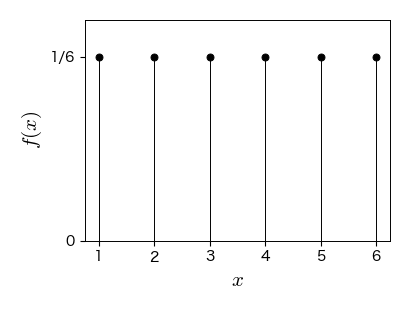

In [173]:
from scipy.stats import uniform
fig, ax = plt.subplots(figsize=(4, 3))
x = [1, 2, 3, 4, 5, 6]
ax.stem(x, uniform.pdf(x, loc=x[0], scale=x[-1]))
ax.set_ylim(0, 0.2)
ax.set_yticks([0, 1/6])
ax.set_yticklabels(['0', '1/6'])
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15);

### ベルヌーイ分布

\begin{align*}
    \begin{split}
    f(x) &= p^{x}(1-p)^{1-x} \\[10pt]
    &= \begin{cases}
        p & (x=1) \\
        1-p & (x=0)
    \end{cases}
    \end{split}
\end{align*}

- 成功確率が $ p $，失敗確率が $ 1-p $ の試行を**ベルヌーイ試行**と呼ぶ．
- 1回のベルヌーイ試行において，成功，失敗を1と0に対応させた確率変数を $ X $ とすると，その確率分布はベルヌーイ分布に従う．

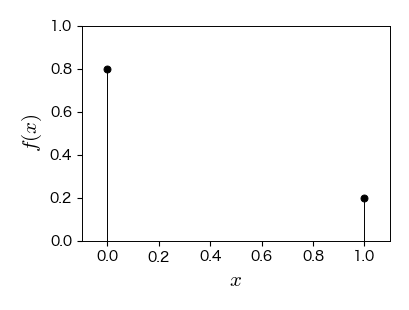

In [174]:
from scipy.stats import bernoulli
fig, ax = plt.subplots(figsize=(4, 3))
x = [0, 1]
ax.stem(x, bernoulli.pmf(x, 0.2))
ax.set_xlim(-0.1, 1.1); ax.set_ylim(0, 1)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15);

### 二項分布

$$ f(x) = \binom{n}{x} p^{x}(1-p)^{n-x} $$

- ベルヌーイ試行を $ n $ 回繰り返すとき，成功回数 $ X $ は二項分布に従う．
- 具体例：コイン投げを繰り返した時に表の出る回数．

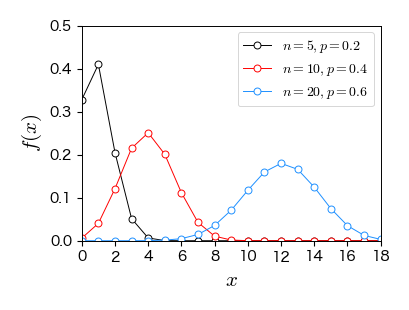

In [175]:
from scipy.stats import binom
fig, ax = plt.subplots(figsize=(4, 3))
x = np.arange(0, 20, 1)
ax.plot(x, binom.pmf(x, 5, 0.2), '-o', mfc='w', ms=5, label='$n=5, p=0.2$')
ax.plot(x, binom.pmf(x, 10, 0.4), '-o', mfc='w', ms=5, label='$n=10, p=0.4$')
ax.plot(x, binom.pmf(x, 20, 0.6), '-o', mfc='w', ms=5, label='$n=20, p=0.6$')
ax.set_xlim(0, 18); ax.set_ylim(0, 0.5)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.set_xticks(x[::2])
ax.legend(numpoints=1, fontsize=10, loc='upper right', frameon=True);

### ポアソン分布

$$ f(x) = \frac{\lambda^{x}}{x!} \mathrm{e}^{-\lambda} $$

- 二項分布において平均を $ np = \lambda $ とおき，$ \lambda $ を一定に保ったまま $ n\to \infty,\ p\to 0 $ とした場合に導かれる．
- 稀な現象（ $ p\to 0 $ ）を大量に（ $ n\to \infty $ ）観測したとき，一定期間内の成功数が従う確率分布として知られている．
- 具体例：交通事故の件数，放射性元素の崩壊数，サッカーの得点

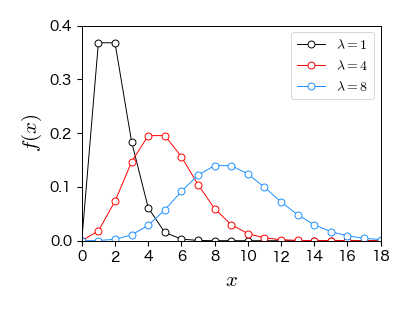

In [176]:
from scipy.stats import poisson
fig, ax = plt.subplots(figsize=(4, 3))
x = np.arange(0, 20, 1)
ax.plot(x, poisson.pmf(x, 1, 1), '-o', mfc='w', ms=5, label='$\lambda=1$')
ax.plot(x, poisson.pmf(x, 4, 1), '-o', mfc='w', ms=5, label='$\lambda=4$')
ax.plot(x, poisson.pmf(x, 8, 1), '-o', mfc='w', ms=5, label='$\lambda=8$')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.set_xlim(0, 18); ax.set_ylim(0, 0.4)
ax.set_xticks(x[::2])
ax.legend(numpoints=1, fontsize=10, loc='upper right', frameon=True);

### 幾何分布

$$ f(x) = (1-p)^{x-1}p $$

- ベルヌーイ試行を繰り返すとき，初めて成功した時点で失敗した回数を確率変数 $ X $ は幾何分布に従う．

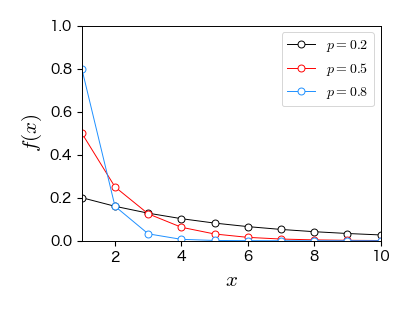

In [177]:
from scipy.stats import geom
fig, ax = plt.subplots(figsize=(4, 3))
x = np.arange(1, 20, 1)
ax.plot(x, geom.pmf(x, 0.2), '-o', mfc='w', ms=5, label='$p=0.2$')
ax.plot(x, geom.pmf(x, 0.5), '-o', mfc='w', ms=5, label='$p=0.5$')
ax.plot(x, geom.pmf(x, 0.8), '-o', mfc='w', ms=5, label='$p=0.8$')
ax.set_xlim(1, 10); ax.set_ylim(0, 1)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=10, loc='upper right', frameon=True);

### 超幾何分布

$$ f(x) = \frac{\binom{K}{x}\binom{N-K}{n-x}}{\binom{N}{n}} $$

- 赤玉 $ K $ 個と青玉 $ N-K $ 個を混ぜた計 $ N $ 個の中から，$ n $ 個を取り出すとき，含まれている赤玉の数 $ X $ は超幾何分布に従う．

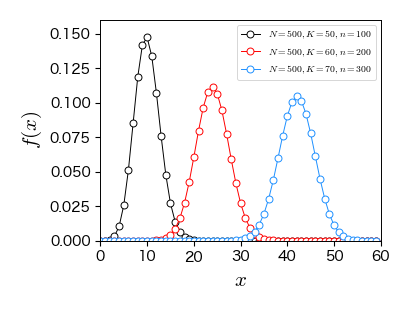

In [160]:
from scipy.stats import hypergeom
fig, ax = plt.subplots(figsize=(4, 3))
x = np.arange(0, 60, 1)
ax.plot(x, hypergeom.pmf(x, 500, 100, 50), '-o', mfc='w', ms=5, label='$N=500, K=50, n=100$')
ax.plot(x, hypergeom.pmf(x, 500, 200, 60), '-o', mfc='w', ms=5, label='$N=500, K=60, n=200$')
ax.plot(x, hypergeom.pmf(x, 500, 300, 70), '-o', mfc='w', ms=5, label='$N=500, K=70, n=300$')
ax.set_xlim(0, 60); ax.set_ylim(0, 0.16)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=7, loc='upper right', frameon=True);

### 負の二項分布

$$ f(x)= \binom{r+x-1}{x} p^{r} (1-p)^{x} $$

- ベルヌーイ試行を繰り返すとき，$ r $ 回成功した時点での失敗回数 $ X $ は負の二項分布に従う．
- 具体例：ネットゲームで１ゲーム獲得するまでの失点数

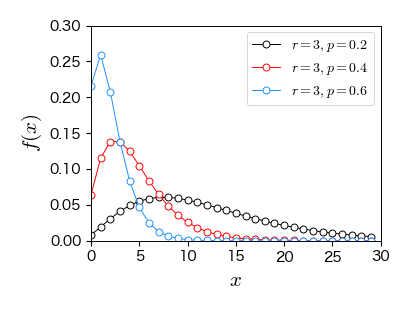

In [161]:
from scipy.stats import nbinom
fig, ax = plt.subplots(figsize=(4, 3))
x = np.arange(0, 30, 1)
ax.plot(x, nbinom.pmf(x, 3, 0.2), '-o', mfc='w', ms=5, label='$r=3, p=0.2$')
ax.plot(x, nbinom.pmf(x, 3, 0.4), '-o', mfc='w', ms=5, label='$r=3, p=0.4$')
ax.plot(x, nbinom.pmf(x, 3, 0.6), '-o', mfc='w', ms=5, label='$r=3, p=0.6$')
ax.set_xlim(0, 30); ax.set_ylim(0, 0.3)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=10, loc='upper right', frameon=True);

## 代表的な連続型確率分布


### 一様分布

$$ f(x) = \frac{1}{b-a},\quad  (a\leq x \leq b) $$

- $ f(x) $ が確率変数 $ X $ の値に依らず，一定値を取る分布．

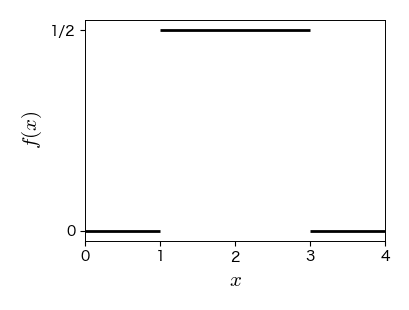

In [183]:
from scipy.stats import uniform
fig, ax = plt.subplots(figsize=(4, 3))
ax.hlines(0, -10, 1, colors='k', lw=2)
ax.hlines(1/2, 1, 3, colors='k', lw=2)
ax.hlines(0, 3, 10, colors='k', lw=2)
ax.set_xlim([0, 4])
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_yticks([0, 1/2])
ax.set_yticklabels(['0', '1/2'])
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15);

### 正規分布

$$ f(x) = \frac{1}{\sqrt{2\pi} \sigma} \exp\left[- \frac{(x-\mu)^{2}}{2\sigma^{2}}\right] $$

- 様々な自然現象，社会現象において観られる確率分布．
- 二項分布で $ n\to \infty $ とした場合に現れる．
- 正規分布が現れるメカニズムには中心極限定理「任意の分布に従う $ n $ 個の確率変数の和の分布が $ n $ を大きくしたときに正規分布に近づく」がある．
- 具体例：成人の身長，測定誤差

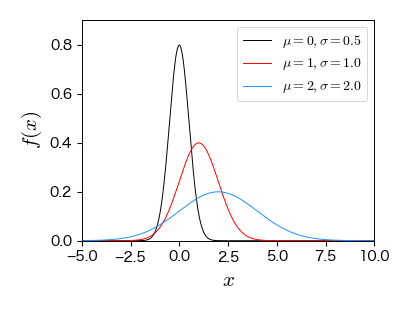

In [182]:
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(4, 3))
x = np.arange(-5, 10, 0.01)
ax.plot(x, norm.pdf(x, 0, 0.5), '-', mfc='w', ms=5, label='$\mu=0, \sigma=0.5$')
ax.plot(x, norm.pdf(x, 1, 1.0), '-', mfc='w', ms=5, label='$\mu=1, \sigma=1.0$')
ax.plot(x, norm.pdf(x, 2, 2.0), '-', mfc='w', ms=5, label='$\mu=2, \sigma=2.0$')
ax.set_xlim(-5, 10); ax.set_ylim(0, 0.9)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=10, loc='upper right', frameon=True);

### 指数分布

$$ f(x) = \frac{1}{\lambda} \mathrm{e}^{-x/\lambda}, \quad (x \geq 0) $$ 

- 連続的な時間で事象が独立に一定の確率で生じるような確率過程（ポアソン過程）において，初めて事象が生じるまでの待ち時間分布は指数分布に従う．
- 幾何分布の連続変数版．
- 具体例：放射性元素の崩壊間隔，バスケットボールの得点間隔

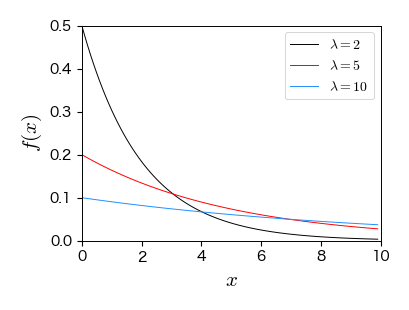

In [181]:
from scipy.stats import expon
fig, ax = plt.subplots(figsize=(4, 3))
x = np.arange(0, 10, 0.1)
ax.plot(x, expon.pdf(x, loc=0, scale=2), '-', mfc='w', ms=5, label='$\lambda=2$')
ax.plot(x, expon.pdf(x, loc=0, scale=5), '-', mfc='w', ms=5, label='$\lambda=5$')
ax.plot(x, expon.pdf(x, loc=0, scale=10), '-', mfc='w', ms=5, label='$\lambda=10$')
ax.set_xlim(0, 10); ax.set_ylim(0, 0.5)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=10, loc='upper right', frameon=True);

### ガンマ分布

$$ f(x) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}x^{\alpha - 1} \mathrm{e}^{-\beta x}, \quad (x > 0) $$

- ポアソン過程において，事象が $ \alpha $ 回生じるまでの待ち時間はガンマ分布に従う．
- 指数分布に従う確率変数の和の分布はガンマ分布に従う．

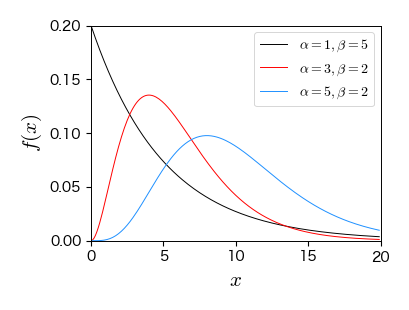

In [180]:
from scipy.stats import gamma
fig, ax = plt.subplots(figsize=(4, 3))
x = np.arange(0, 20, 0.1)
ax.plot(x, gamma.pdf(x, 1, scale=5), '-', mfc='w', ms=5, label='$\\alpha=1, \\beta=5$')
ax.plot(x, gamma.pdf(x, 3, scale=2), '-', mfc='w', ms=5, label='$\\alpha=3, \\beta=2$')
ax.plot(x, gamma.pdf(x, 5, scale=2), '-', mfc='w', ms=5, label='$\\alpha=5, \\beta=2$')
ax.set_xlim(0, 20); ax.set_ylim(0, 0.2)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=10, loc='upper right', frameon=True);

### 対数正規分布

$$ f(x) = \frac{1}{\sqrt{2\pi}\sigma x} \exp \left[ - \frac{(\log x - \mu)^{2}}{2\sigma^{2}}\right], \quad (x > 0) $$

- 確率変数 $ X $ の対数変換 $ Y=\log X $ が正規分布に従うとき，$ X $ は対数正規分布に従う．
- 一般に，確率変数 $ X_{t} $，$ \alpha_{t} $ に対して，$ X_{t} $ の時間発展が

    $$
        X_{t} = \alpha_{t-1} X_{t-1}
    $$

    で与えられるとする．これは，ある量 $ X_{t-1} $ にランダムな成長率 $ \alpha_{t} $ を掛けたものが次の時刻の値 $ X_{t} $ になるということを意味し，**ランダム乗算過程**と呼ばれる．
- ランダム乗算過程において，$ t\to \infty $ における $ X_{t} $ の分布は対数正規分布に従う．
- 具体例１：ガラス棒を落として破壊する実験を考える．時刻 $ t $ における破片の大きさを $ X_{t} $ とすると，$ X_{t} $ の時間発展はランダム乗算過程で記述できる（ただし，落とす高さなどにも依存する）{cite}`松下2019,Kuninaka2011`．
- 具体例２：社会現象における対数正規分布の例としては，高齢者の死亡年齢，児童生徒の身長・体重，駅の降車人数，アニメのキャラクターのサイズ，などが知られている{cite}`Kuninaka2011`．

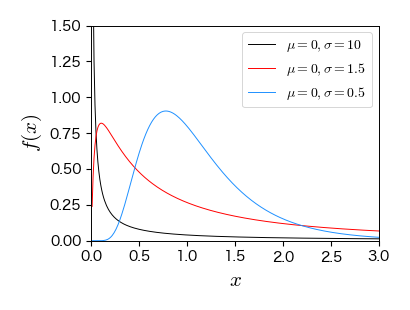

In [179]:
from scipy.stats import lognorm
fig, ax = plt.subplots(figsize=(4, 3))
x = np.arange(0, 20, 0.01)[1:]
ax.plot(x, lognorm.pdf(x, 10, loc=0), '-', mfc='w', ms=5, label='$\mu=0, \sigma=10$')
ax.plot(x, lognorm.pdf(x, 1.5, loc=0), '-', mfc='w', ms=5, label='$\mu=0, \sigma=1.5$')
ax.plot(x, lognorm.pdf(x, 0.5, loc=0), '-', mfc='w', ms=5, label='$\mu=0, \sigma=0.5$')
ax.set_xlim(0, 3); ax.set_ylim(0, 1.5)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=10, loc='upper right', frameon=True);

### べき分布

$$ f(x)= Cx^{-\alpha} $$ 

- べき分布の著しい性質として，分布を特徴づける平均や分散が意味を成さない点がある．実際，べき分布では極端に大きい値を取る確率が無視できないので，平均値は分布の中心を意味せず，$ \alpha $ の値によっては分散が発散する．
- 自然現象や社会現象にはべき分布に従う現象が数多く観測されている．
- 具体例：地震のエネルギー，個人の資産，都市の人口，テキスト中に出現する単語の頻度，本や音楽の売上げ，論文の引用回数など．
- べき分布が現れる背景には要素間の複雑な相互作用が存在することが多く，その出現メカニズムは未だに研究対象となっている{cite}`Buchanan2009`．

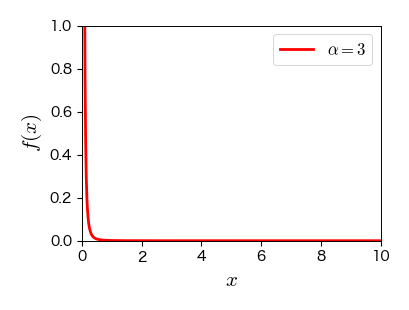

In [178]:
fig, ax = plt.subplots(figsize=(4, 3))
x = np.arange(0, 100, 0.01)[1:]
ax.plot(x, x**(-3)/1000, 'r-', lw=2, label='$\\alpha=3$')
ax.set_xlim(0, 10); ax.set_ylim(0, 1)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=12, loc='upper right', frameon=True);